In [1]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from os import environ

filename = environ['input_data_fp']
fig_no = int(environ['input_fig_number'])
fig_no = 30
if fig_no == 1:
    fig_size = 10
else:
    fig_size = 20

pd.options.display.float_format = '{:10,.2f}'.format
pd.set_option('display.width', 999)

key_index = ['actual_paint_frames',
            'expected_frames', 
            'frame_throughput',
            'long_frame']

with open(filename) as data_file:
    data = json.load(data_file)
    fps = data["video-recording-fps"]
    remove_data = ["video-recording-fps"]
    for item in remove_data:
        del data[item]
    d = pd.DataFrame(data)
    df = pd.concat([pd.DataFrame(d[column]['time_list']).T for column in d], axis=1)
    dft = df.loc[key_index, :]

In [2]:
non_freeze_frame_timestamps = pd.concat([pd.DataFrame(d[column]['time_list']) for column in d], axis=1).loc[:,'non_freeze_frame_timestamps']
non_freeze_frame_timestamps.columns = d.columns
case_name_list = list(non_freeze_frame_timestamps)

case = case_name_list[0]
c = non_freeze_frame_timestamps[case]
frame = pd.DataFrame([pd.Series(i).diff()
                                  .dropna()
                                  .apply(lambda x: np.round(x/11.11)) for i in c]).T


In [3]:
str(case)

'test_chrome_facebook_ft_type_composerbox_100_txt_delay_50ms'

In [4]:
frame.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], interpolation='nearest')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.05,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.25,3.00,6.00,4.00,6.00,6.00,5.00,6.00,3.00,6.00,6.00,...,5.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,5.00,4.00
0.50,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
0.75,9.00,12.00,9.00,8.00,11.00,12.00,12.00,11.00,12.00,12.00,...,12.00,12.00,9.00,12.00,12.00,8.00,9.00,12.00,9.00,9.00
0.95,19.00,18.00,24.00,24.00,24.00,25.00,26.00,24.00,26.00,25.00,...,25.00,25.00,25.00,24.00,25.00,25.00,25.00,24.00,20.00,24.00
0.99,26.00,26.00,25.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,...,25.00,26.00,26.00,25.00,26.00,26.00,25.00,25.00,25.00,25.00


In [5]:
frame.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,74.00,71.00,71.00,71.00,70.00,69.00,67.00,72.00,69.00,68.00,...,67.00,70.00,71.00,69.00,68.00,71.00,71.00,70.00,72.00,72.00
mean,7.50,7.86,7.80,7.83,7.94,8.03,8.30,7.71,8.07,8.13,...,8.31,7.91,7.83,8.03,8.15,7.79,7.83,7.94,7.72,7.68
std,5.89,5.53,6.14,6.15,5.97,6.15,6.48,6.17,6.26,6.11,...,6.30,6.46,6.21,5.85,6.05,6.15,6.19,6.00,5.93,6.14
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.25,6.00,4.00,5.00,6.00,5.00,6.00,3.00,6.00,6.00,...,5.50,6.00,5.50,6.00,6.00,6.00,5.00,6.00,4.75,3.75
50%,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
75%,8.75,12.00,10.50,10.00,10.50,12.00,12.00,11.25,12.00,12.00,...,12.00,11.25,10.50,12.00,12.00,8.50,10.50,11.75,9.75,9.75
max,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,...,26.00,26.00,26.00,26.00,26.00,26.00,26.00,25.00,26.00,26.00


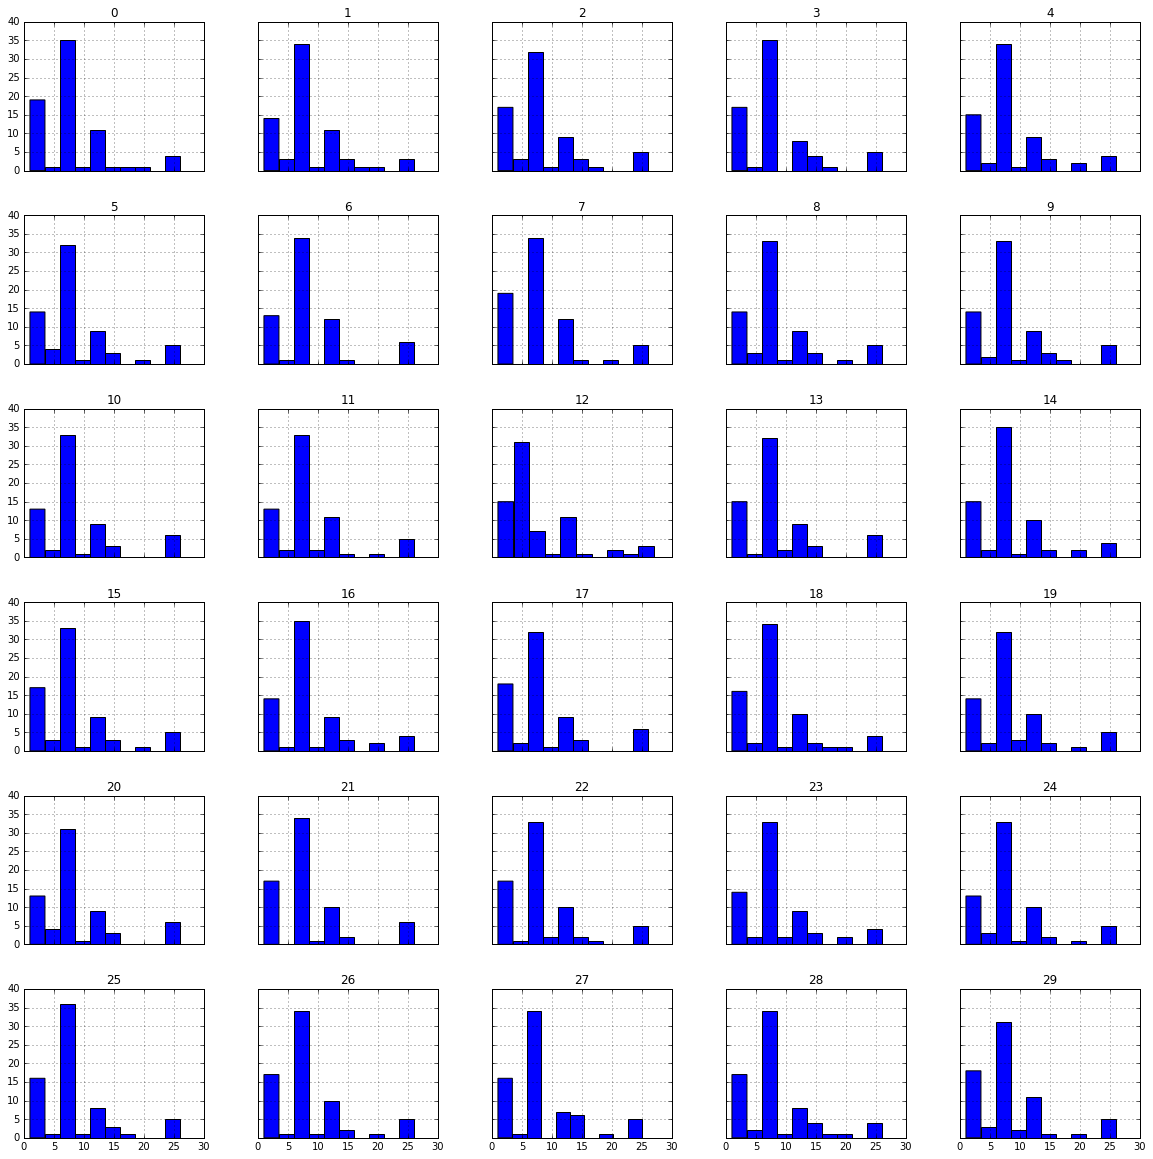

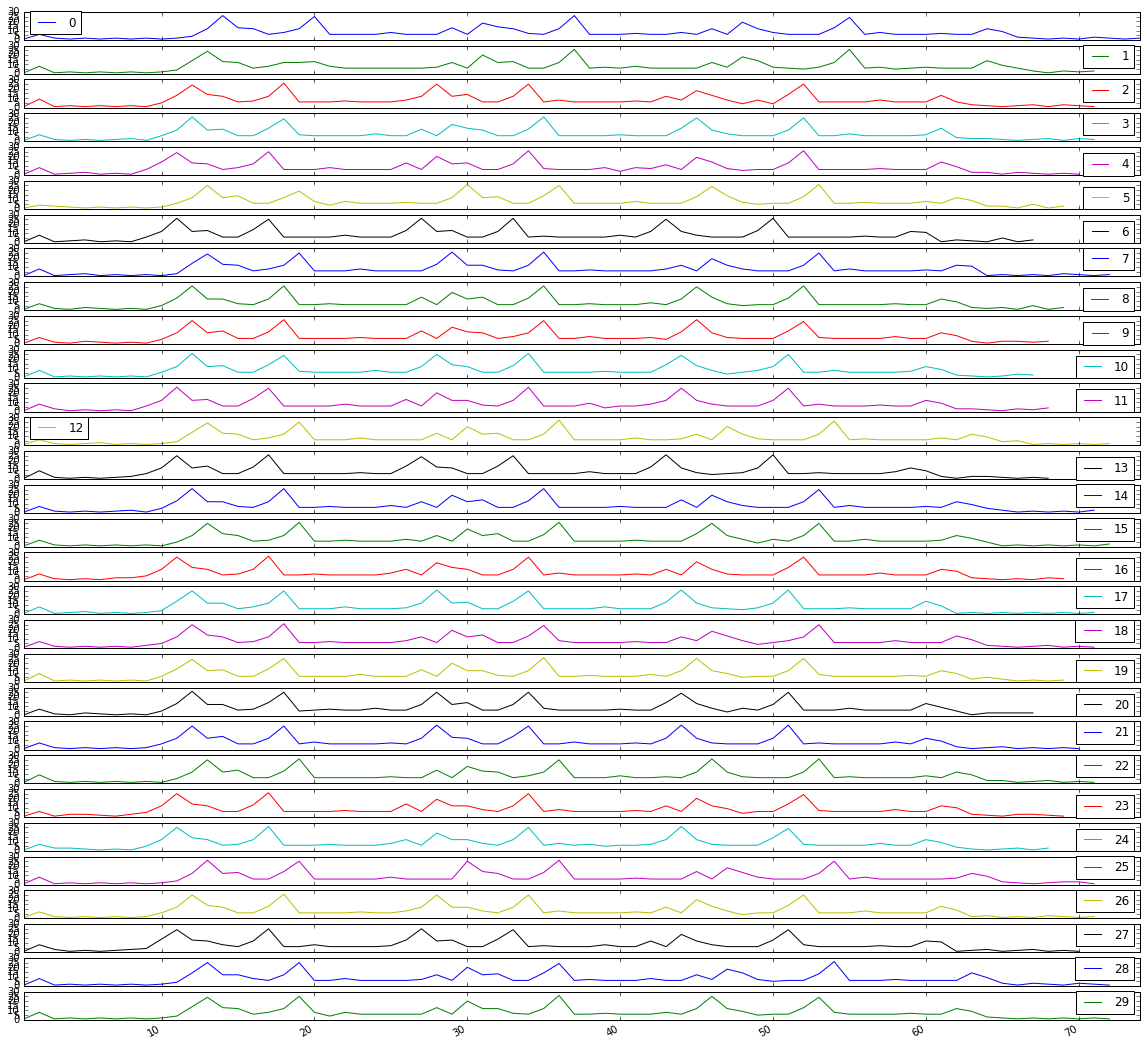

In [6]:
frame.hist( layout=(6,5), sharey=True, sharex=True, figsize=(20,20))
frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,20), ylim=(0,30))
plt.show()

In [4]:
sum(frame.corr().cumsum().T[frame.shape[1]-1])

420.07258066947298

In [5]:
case = case_name_list[1]
c = non_freeze_frame_timestamps[case]
frame = pd.DataFrame([pd.Series(i).diff()
                                  .dropna()
                                  .apply(lambda x: np.round(x/11.11)) for i in c]).T


In [6]:
str(case)

'test_firefox_facebook_ft_type_composerbox_100_txt_delay_50ms'

In [7]:
frame.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], interpolation='nearest')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.05,2.00,3.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,...,2.00,1.00,2.00,2.00,2.00,3.00,1.00,2.00,2.00,1.00
0.25,6.00,5.00,5.00,6.00,5.00,5.00,6.00,6.00,6.00,6.00,...,6.00,5.00,6.00,5.00,6.00,6.00,5.00,6.00,5.00,5.00
0.50,6.00,7.00,6.00,6.00,7.00,7.00,6.00,7.00,6.00,7.00,...,7.00,6.00,7.00,6.00,6.00,7.00,6.00,6.00,6.00,6.00
0.75,12.00,12.00,10.00,12.00,11.00,12.00,11.00,11.00,12.00,11.00,...,11.00,11.00,11.00,12.00,11.00,12.00,12.00,12.00,12.00,12.00
0.95,21.00,21.00,25.00,24.00,23.00,20.00,21.00,22.00,21.00,25.00,...,25.00,21.00,25.00,24.00,21.00,25.00,25.00,25.00,21.00,24.00
0.99,25.00,26.00,27.00,26.00,27.00,25.00,25.00,25.00,22.00,27.00,...,27.00,26.00,27.00,27.00,26.00,26.00,26.00,26.00,25.00,25.00


In [8]:
frame.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,62.00,62.00,63.00,60.00,61.00,63.00,62.00,64.00,64.00,64.00,...,61.00,65.00,61.00,63.00,64.00,62.00,61.00,62.00,64.00,64.00
mean,8.94,8.97,8.81,9.27,9.11,8.79,8.92,8.69,8.69,8.72,...,9.11,8.55,9.16,8.84,8.69,9.00,9.11,9.00,8.70,8.70
std,5.98,5.97,6.75,6.64,6.50,6.01,5.98,5.81,5.71,6.42,...,6.59,5.93,6.56,6.63,5.96,6.33,6.75,6.57,6.15,6.24
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,6.00,5.25,5.00,6.00,5.00,5.00,6.00,6.00,5.75,5.75,...,6.00,5.00,6.00,5.00,5.75,6.00,5.00,6.00,4.75,4.75
50%,6.50,7.00,6.00,6.00,7.00,7.00,6.50,7.00,6.00,7.00,...,7.00,6.00,7.00,6.00,6.00,7.00,6.00,6.00,6.00,6.00
75%,11.75,11.75,10.00,12.25,11.00,12.00,11.00,11.25,12.00,11.00,...,11.00,11.00,11.00,12.00,11.00,11.50,12.00,11.75,12.00,12.00
max,26.00,27.00,32.00,31.00,30.00,26.00,27.00,26.00,24.00,30.00,...,32.00,27.00,31.00,32.00,27.00,31.00,32.00,32.00,27.00,26.00


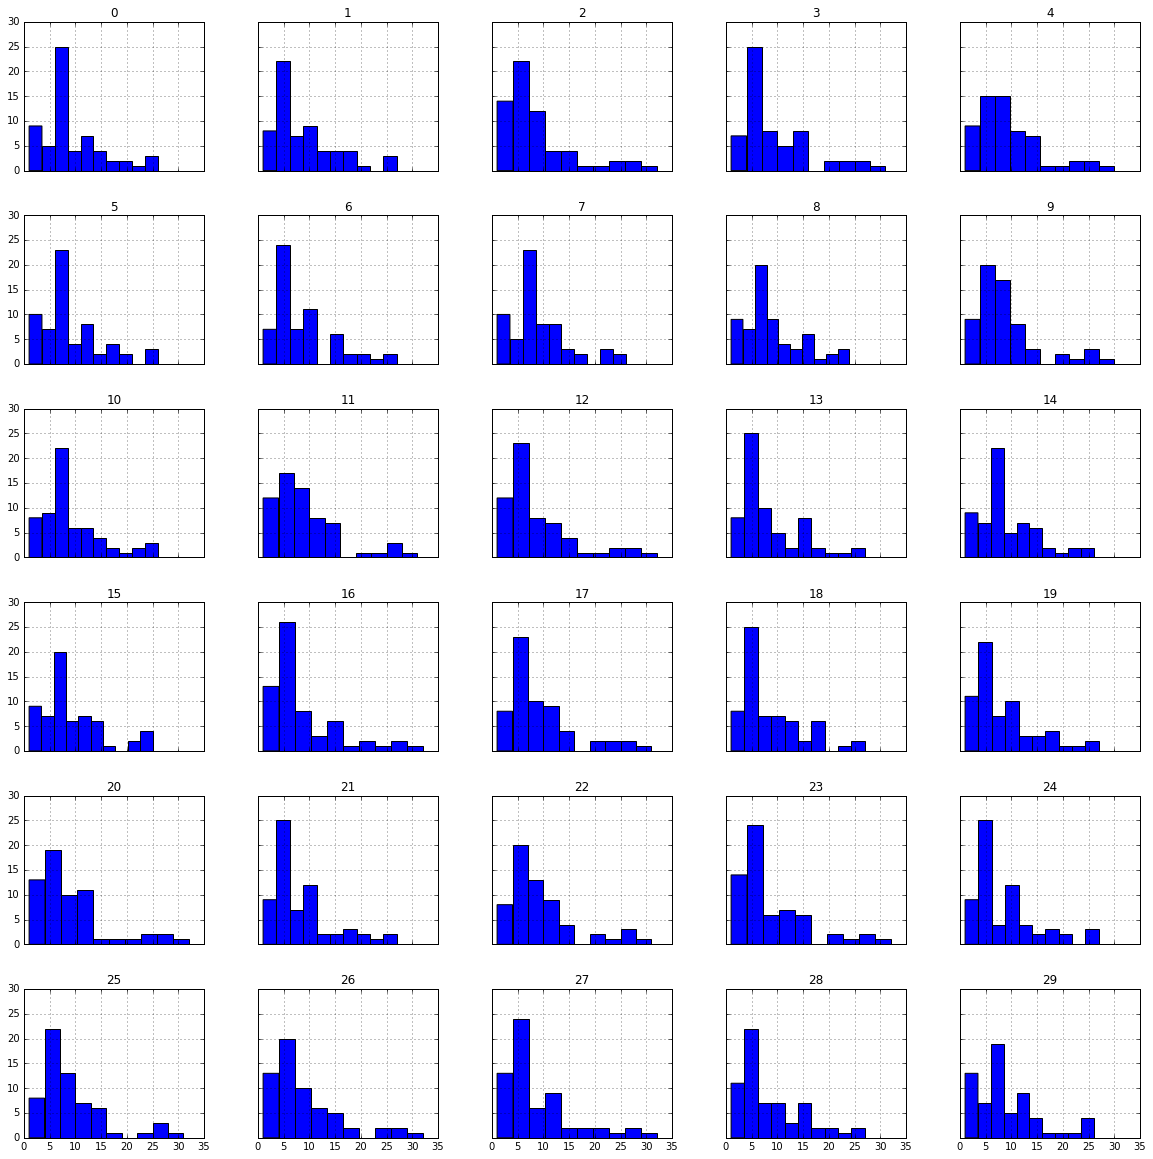

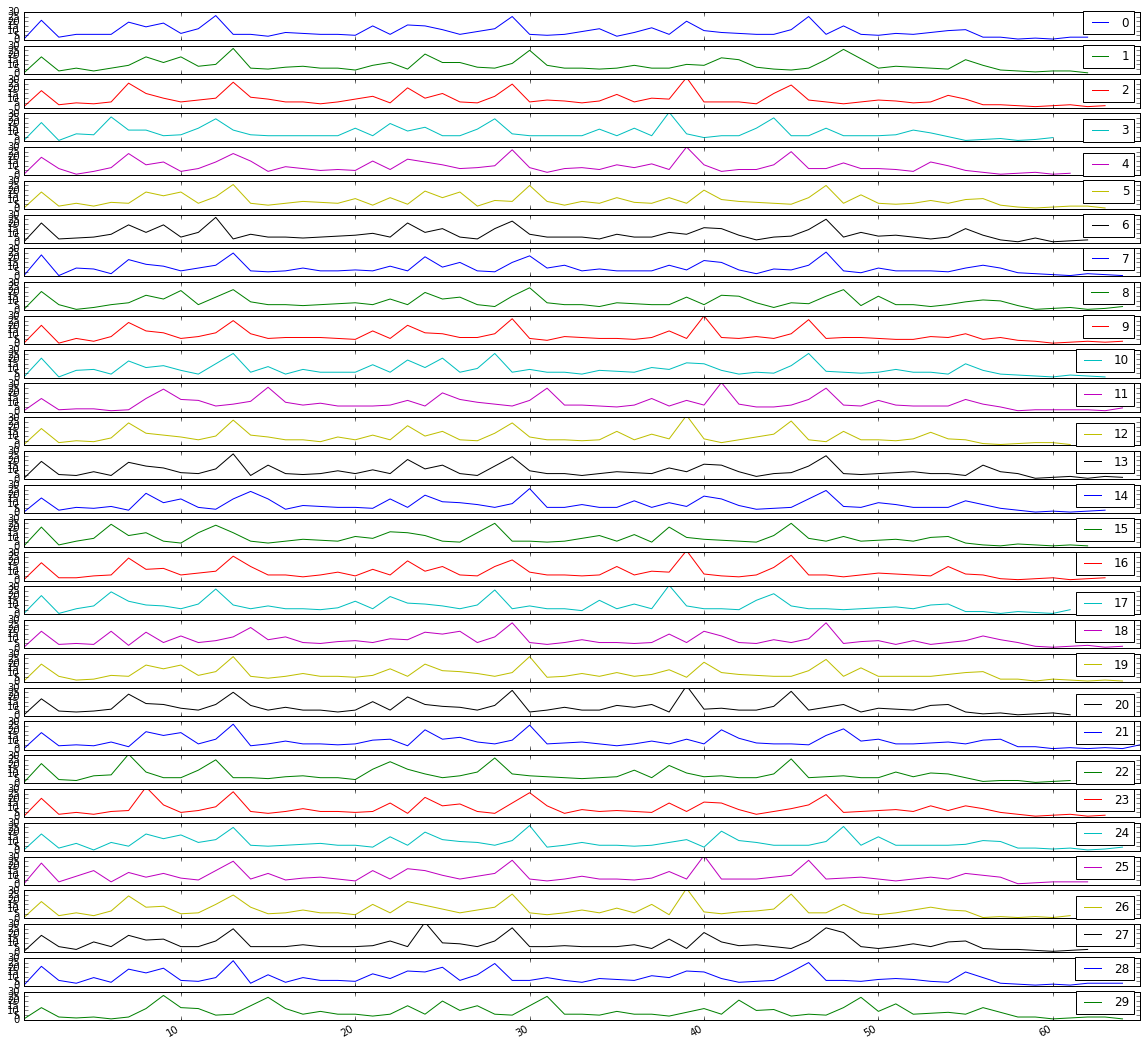

In [11]:
frame.hist( layout=(6,5), sharey=True, sharex=True, figsize=(20,20))
frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,20), ylim=(0,30))
plt.show()

In [9]:
sum(frame.corr().cumsum().T[frame.shape[1]-1])

383.60979156102775